In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from itertools import combinations

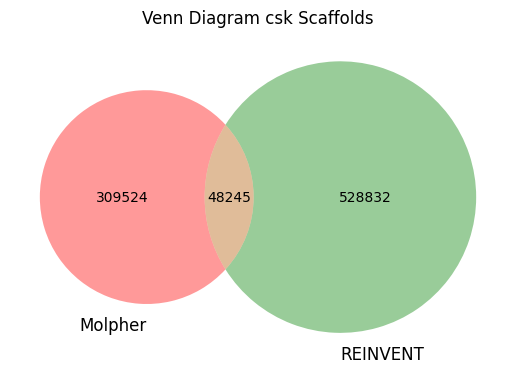

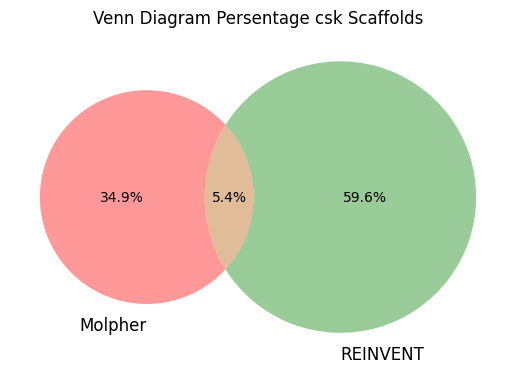

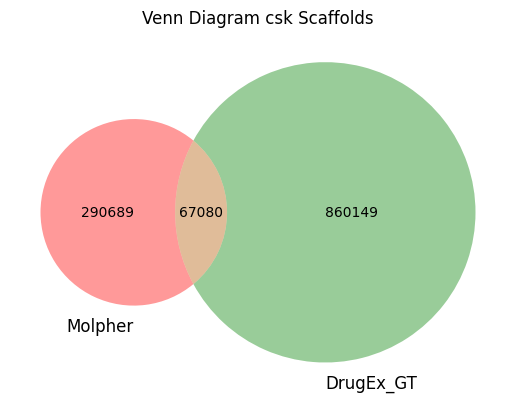

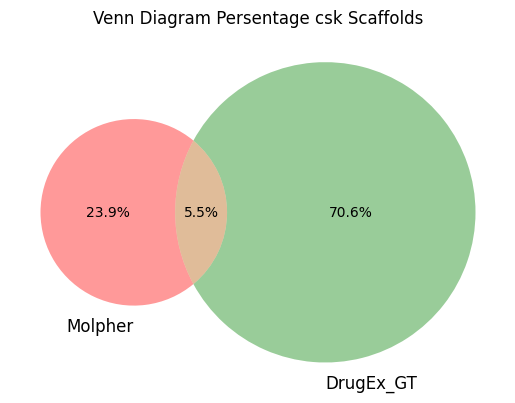

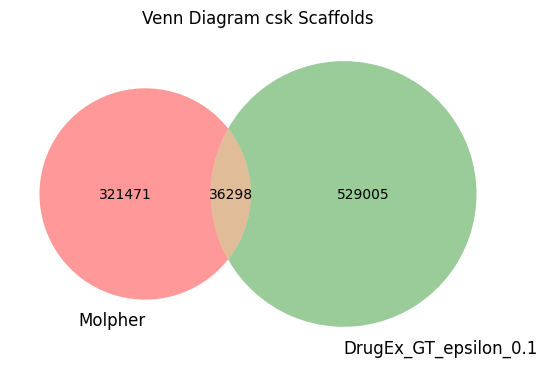

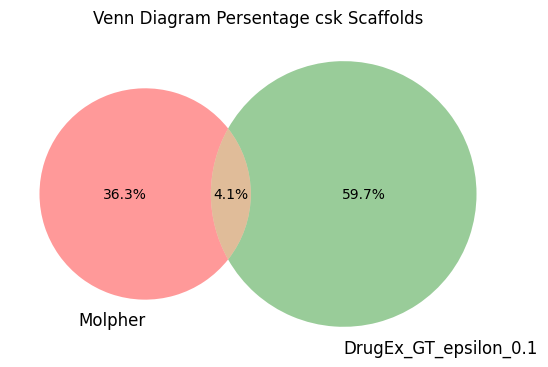

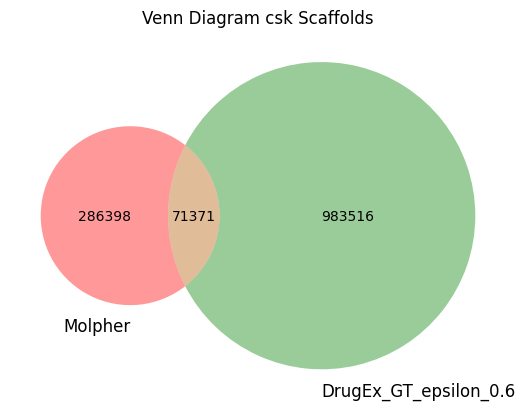

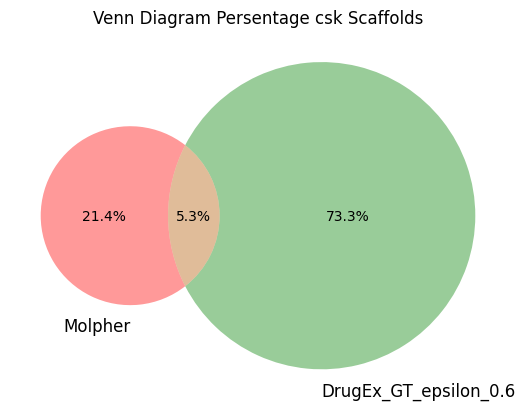

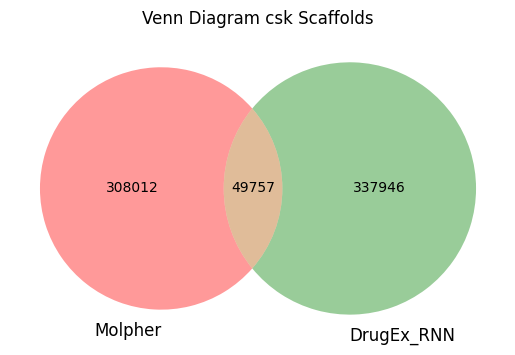

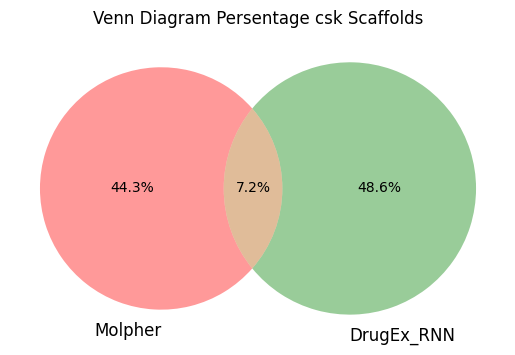

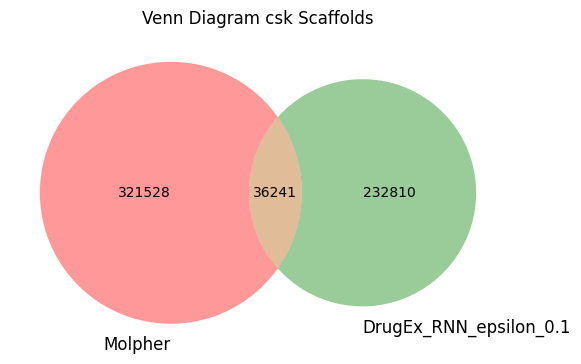

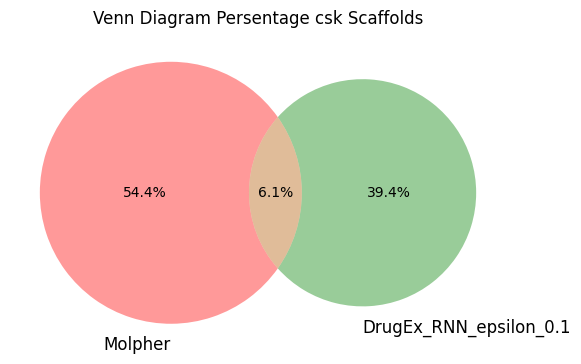

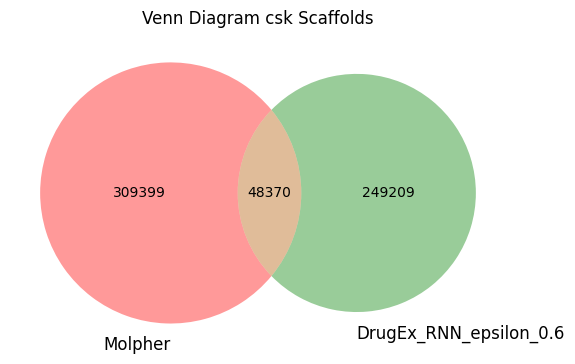

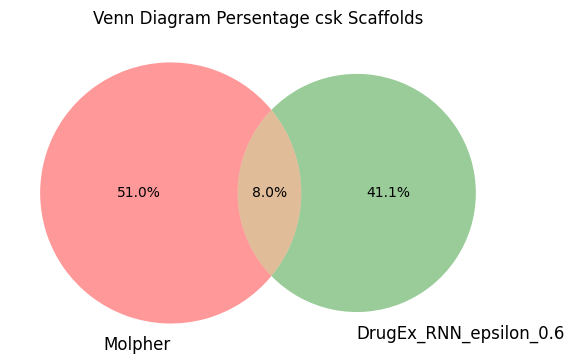

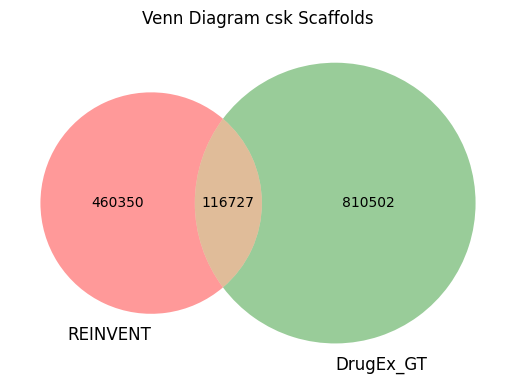

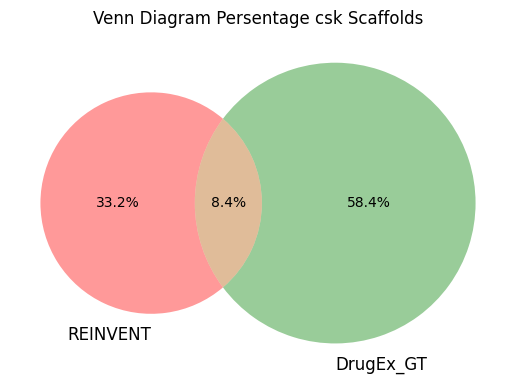

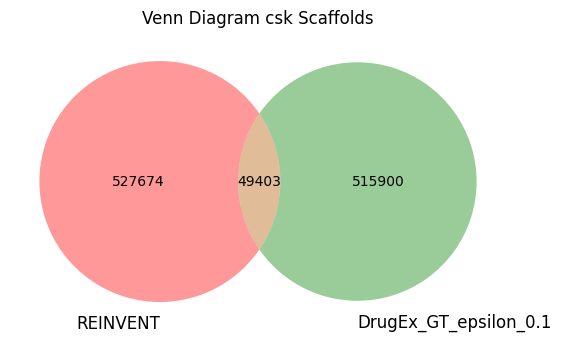

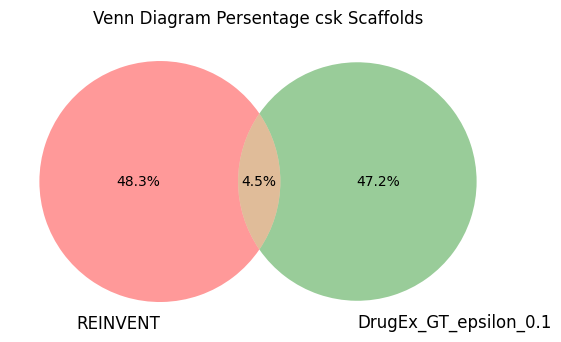

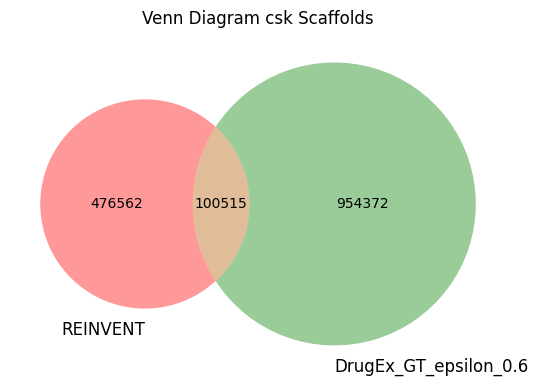

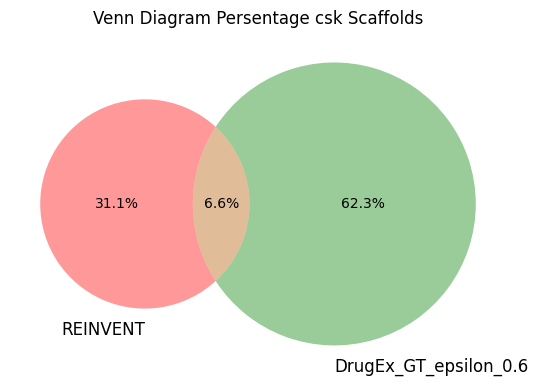

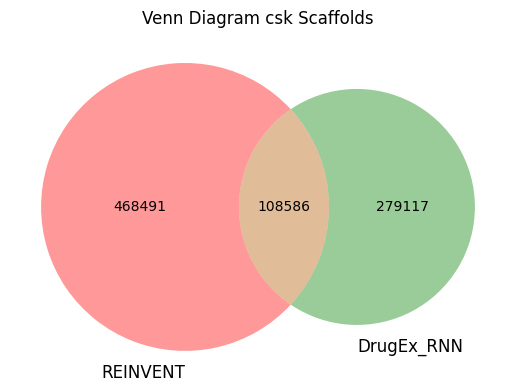

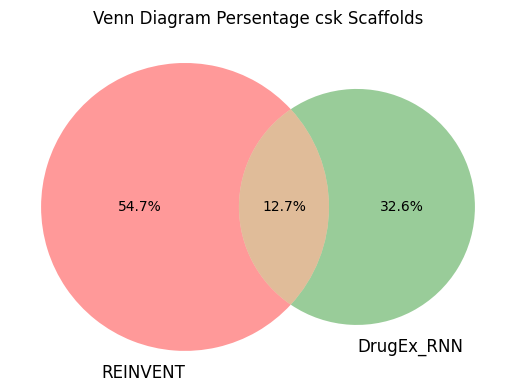

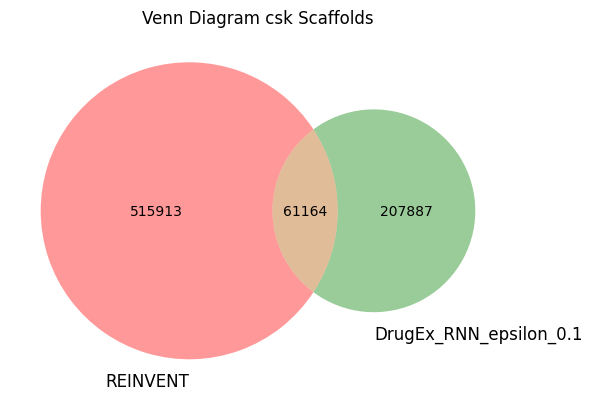

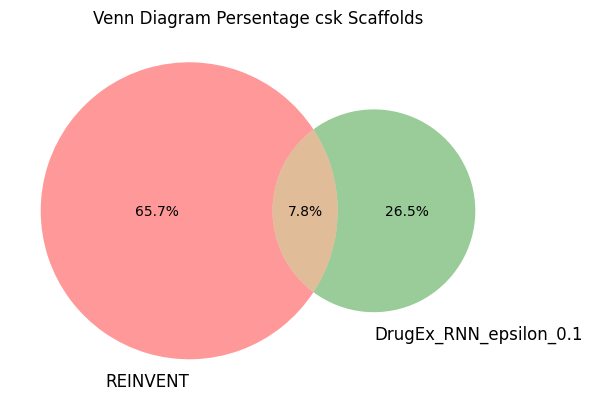

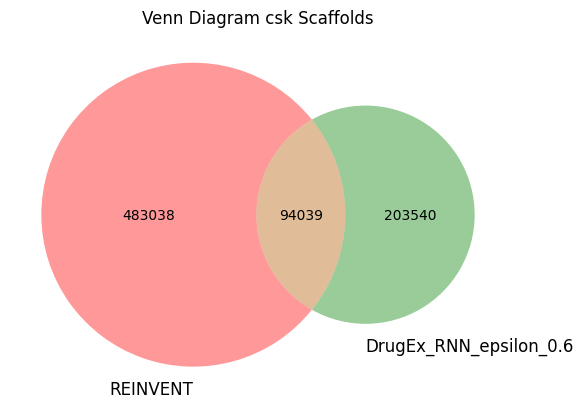

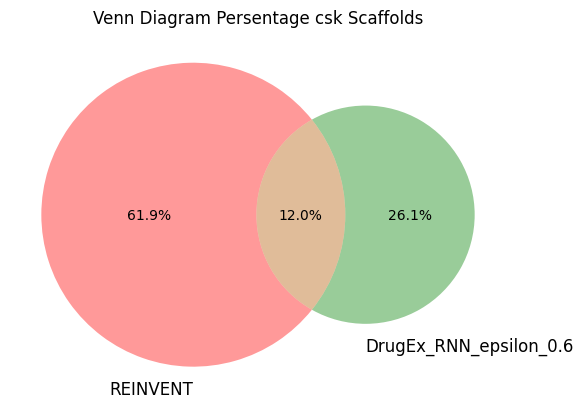

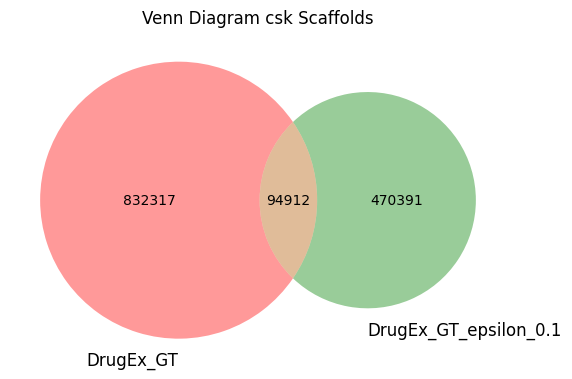

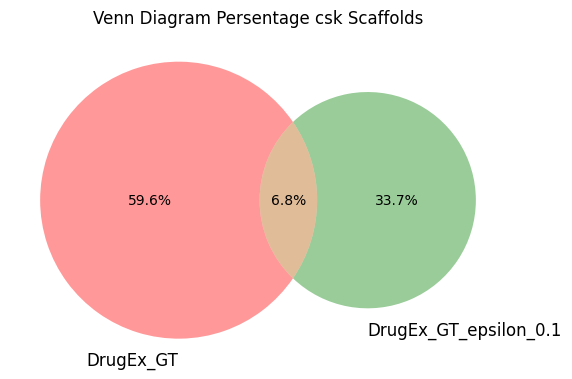

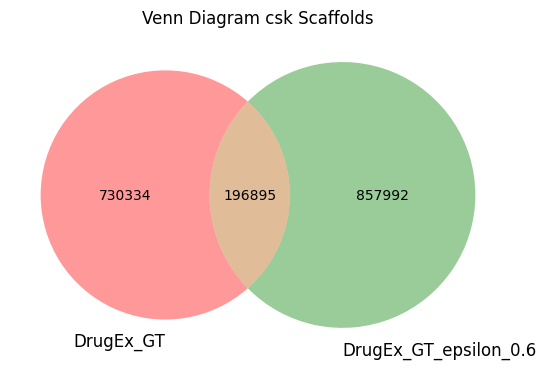

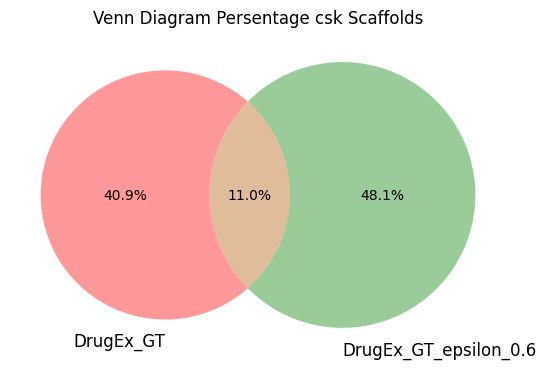

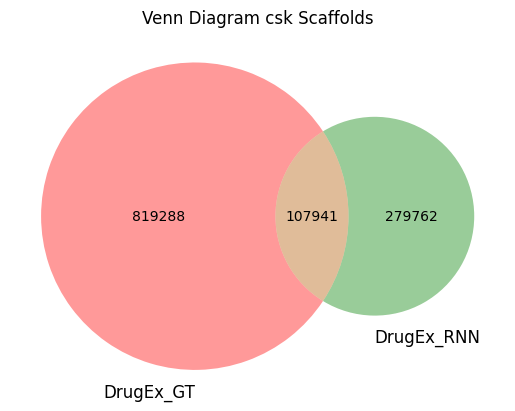

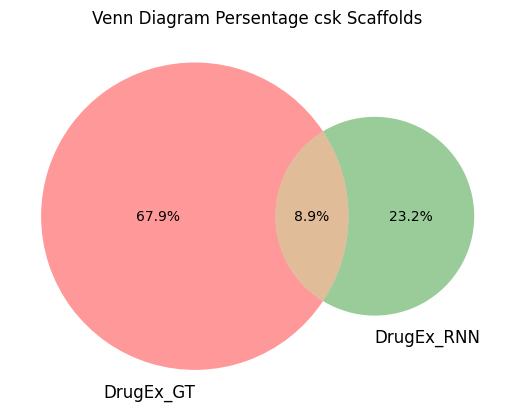

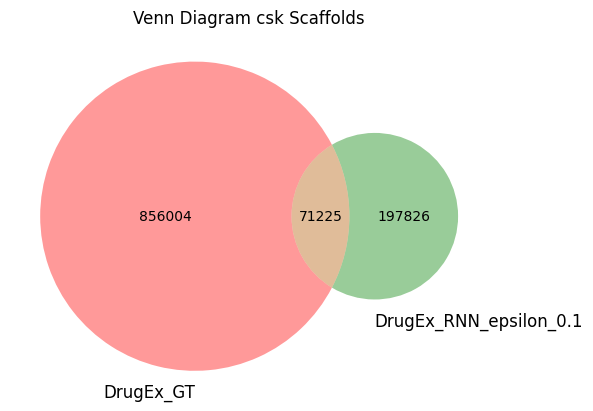

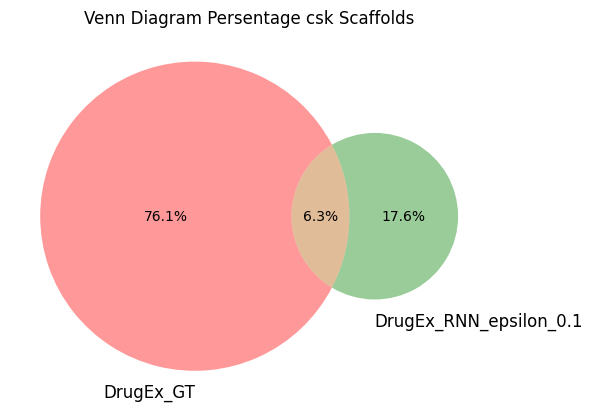

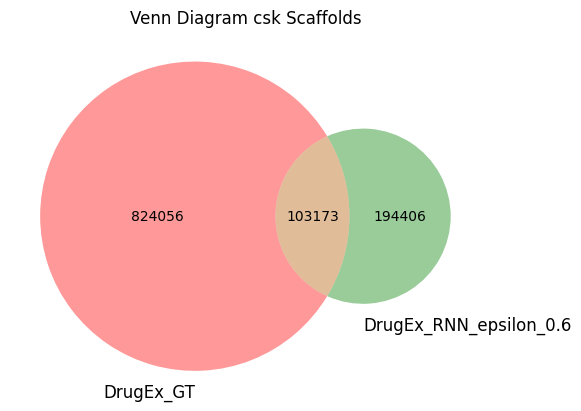

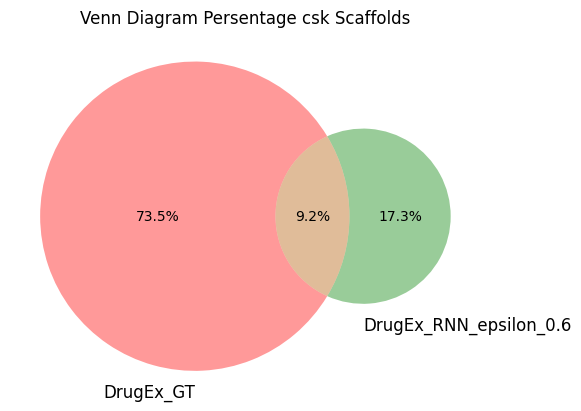

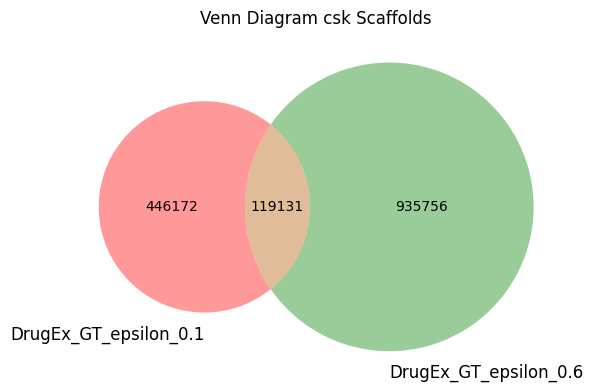

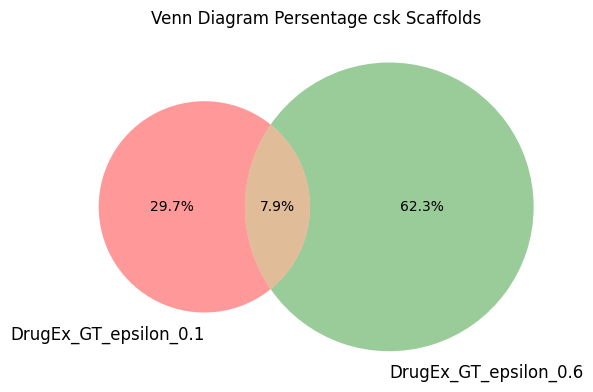

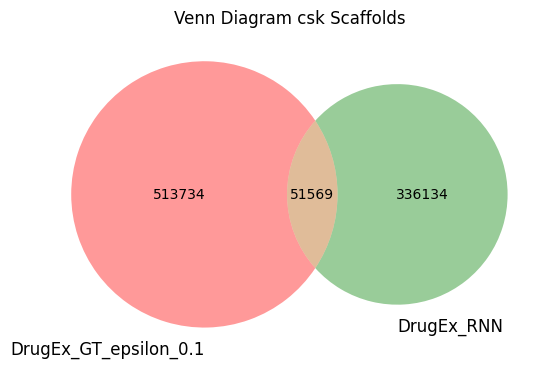

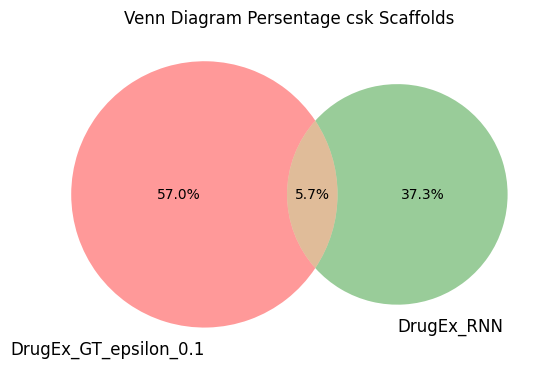

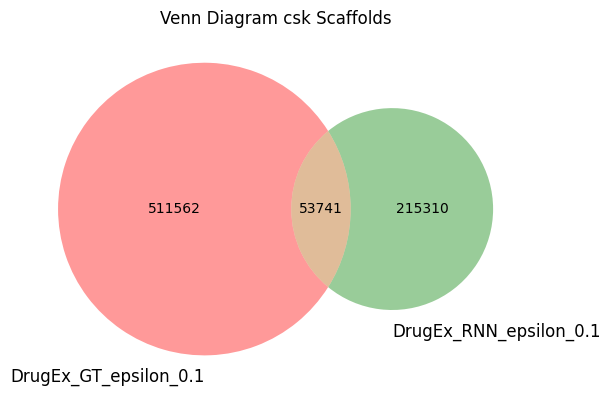

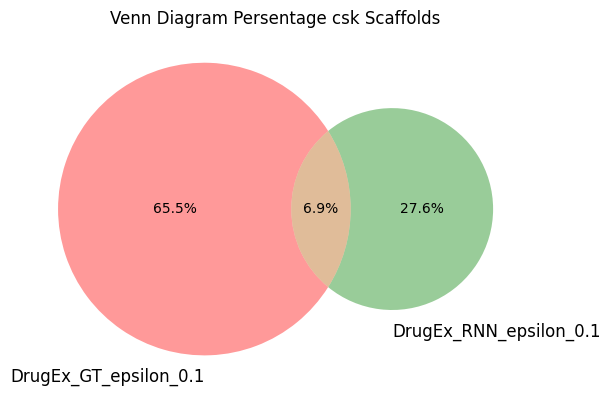

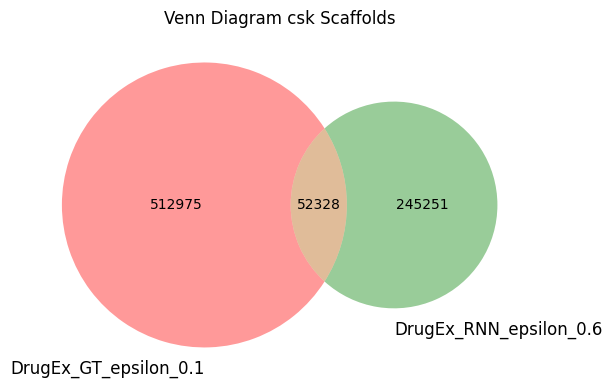

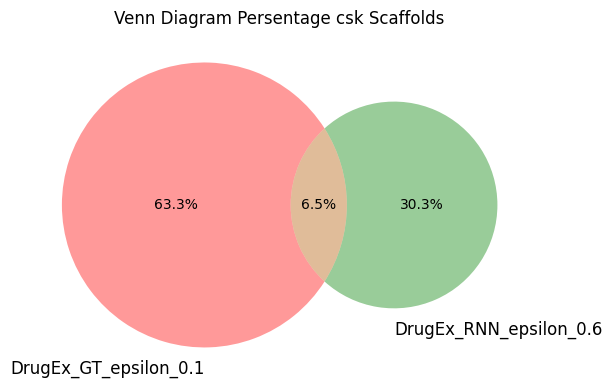

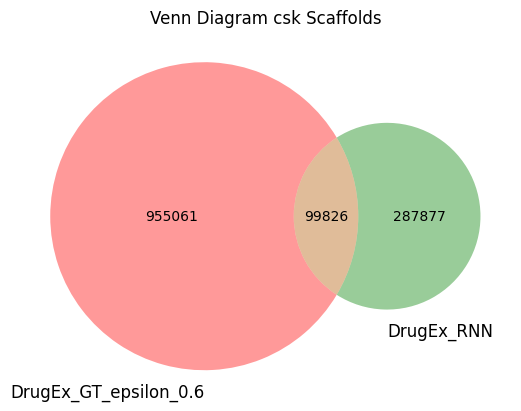

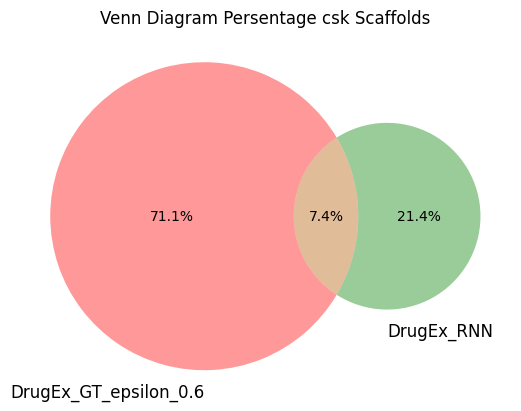

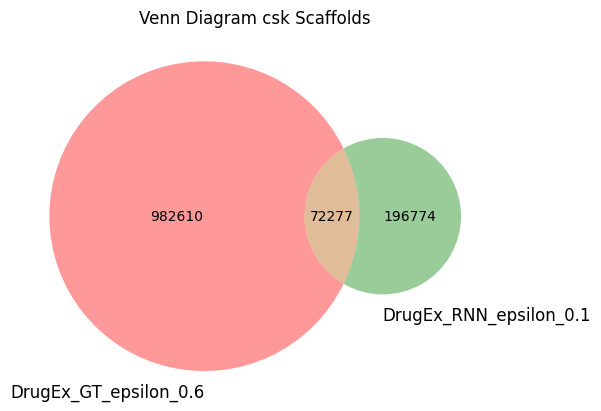

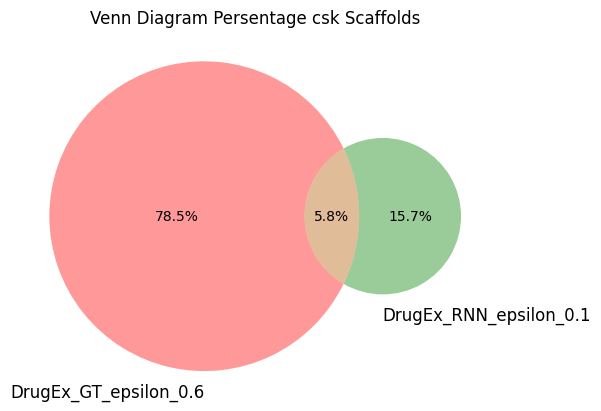

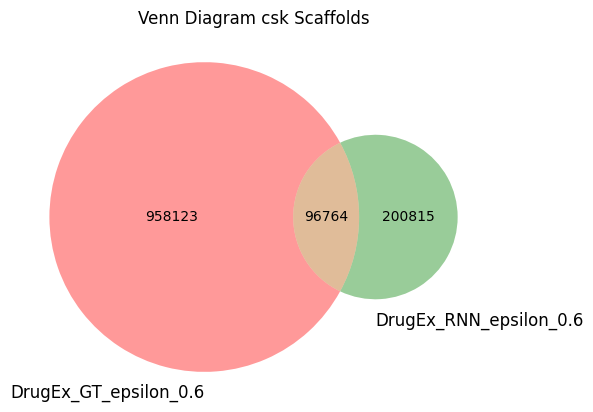

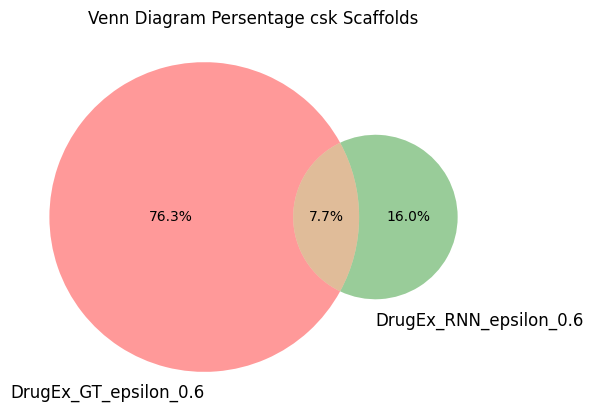

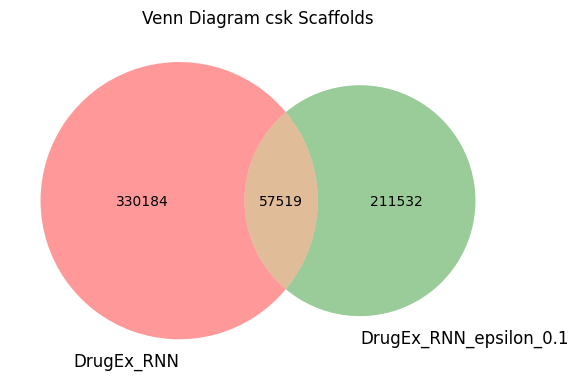

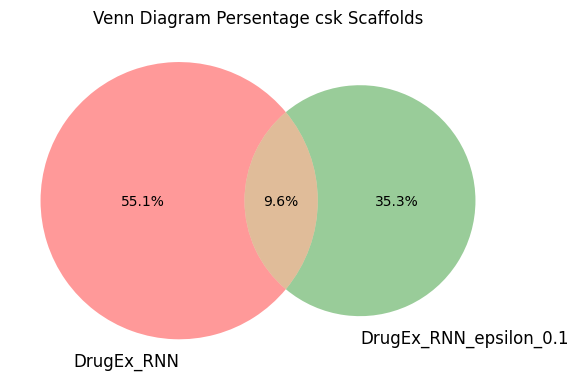

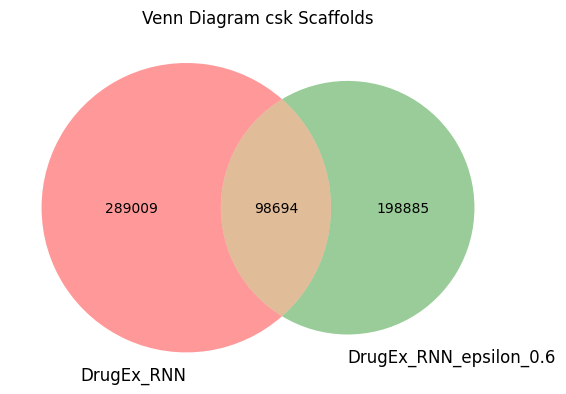

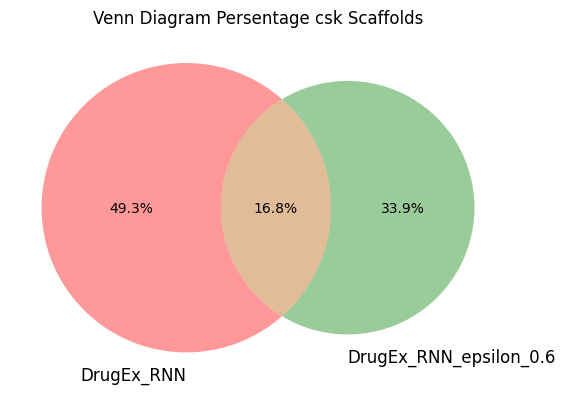

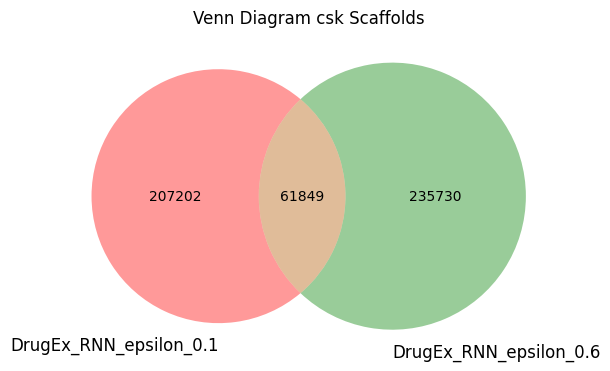

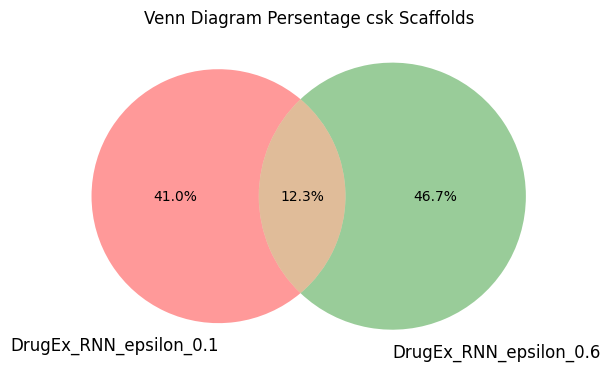

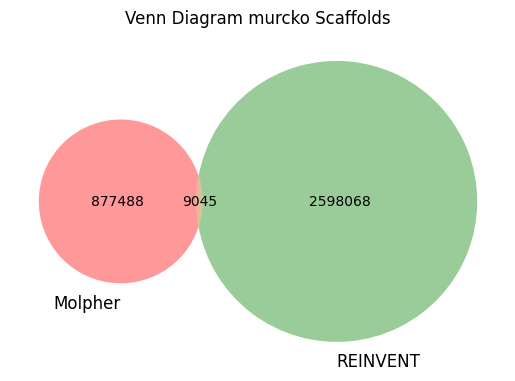

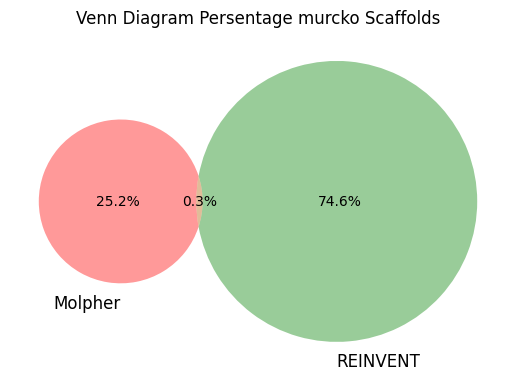

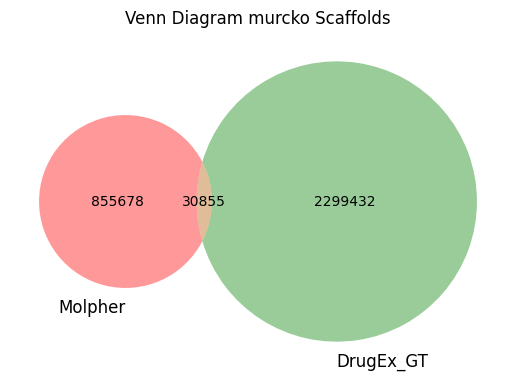

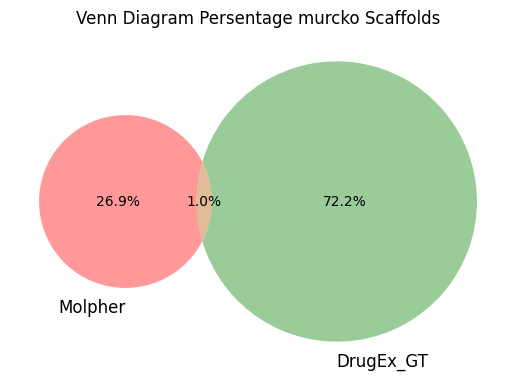

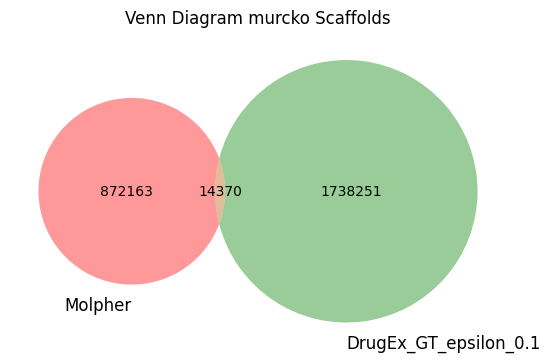

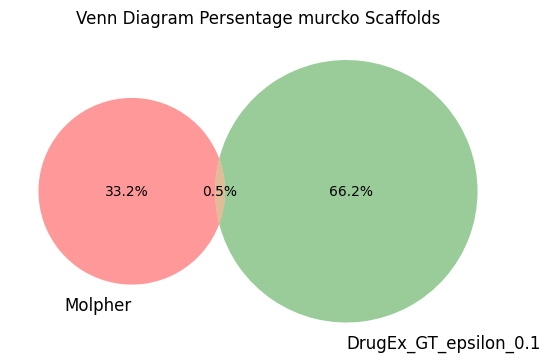

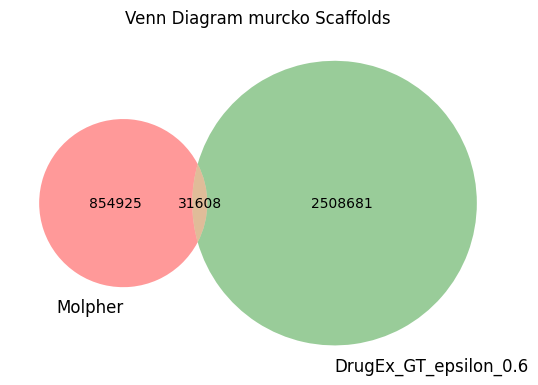

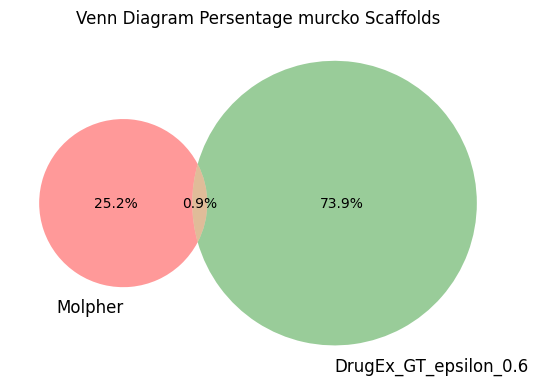

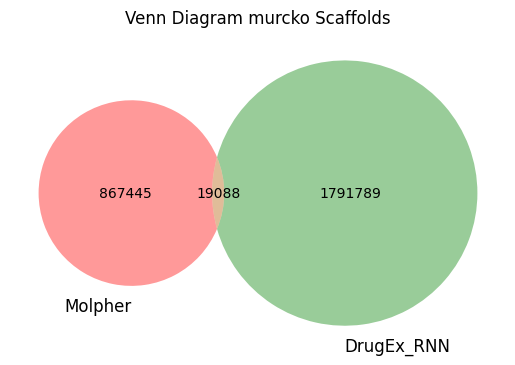

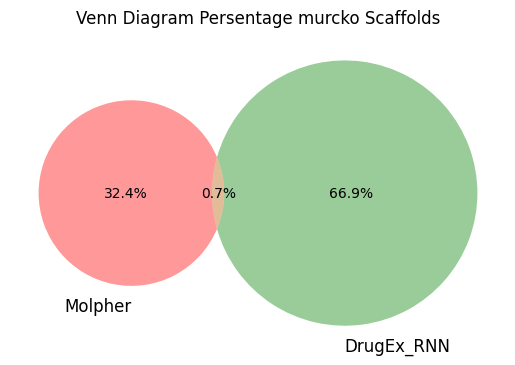

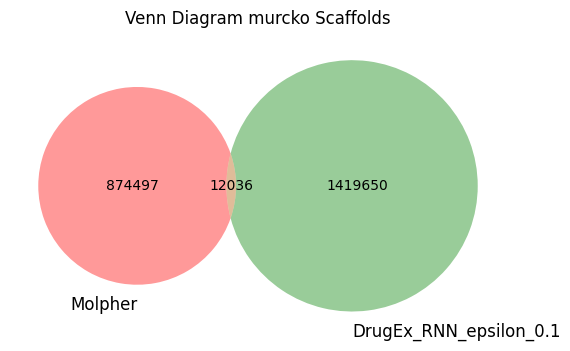

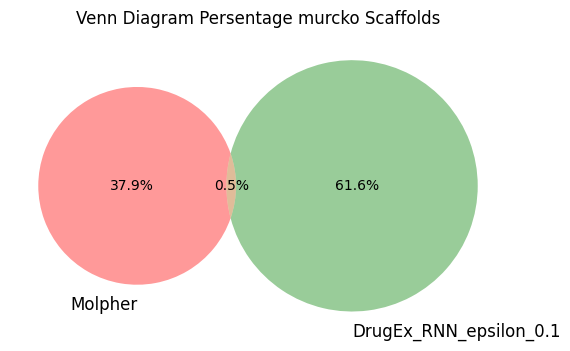

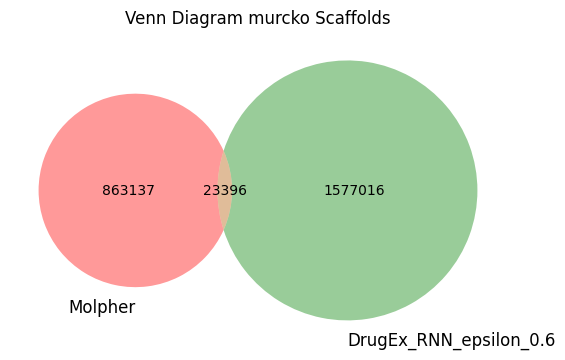

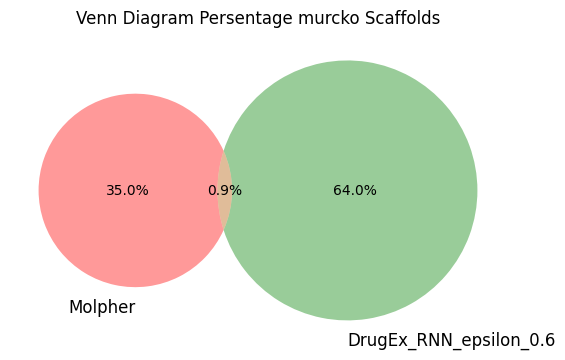

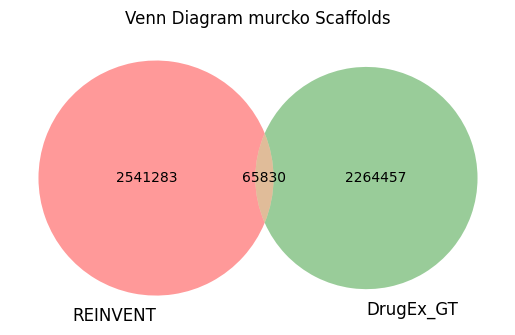

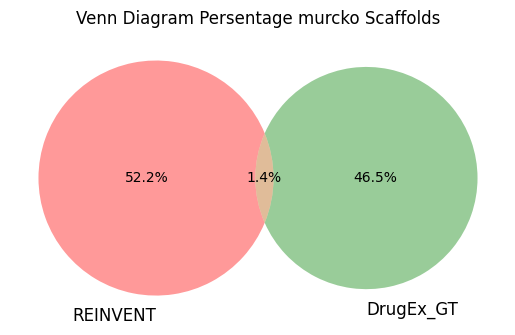

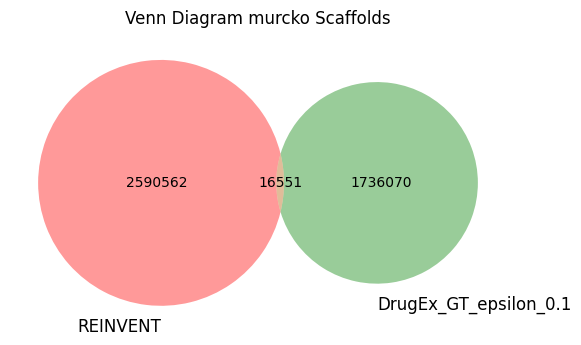

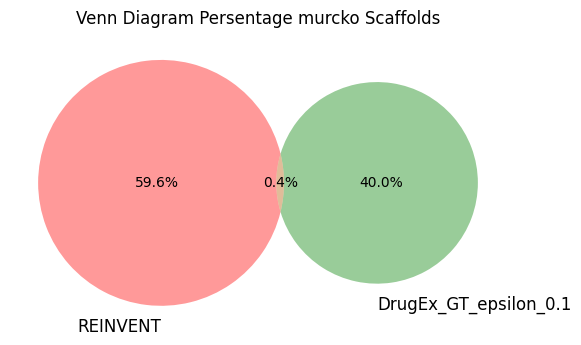

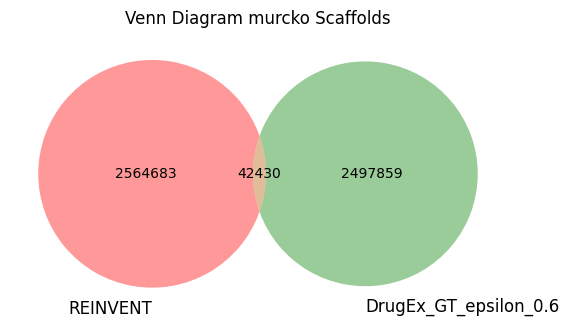

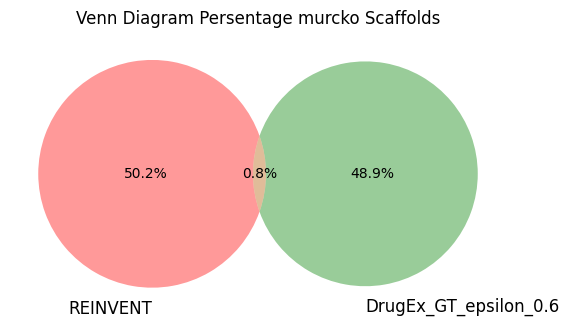

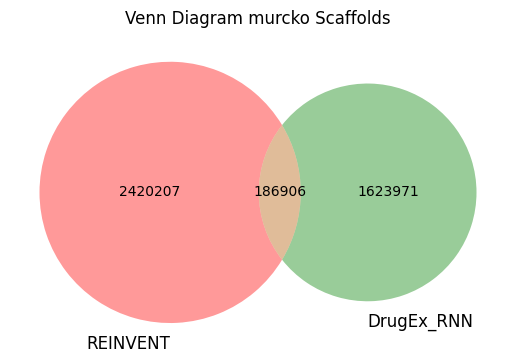

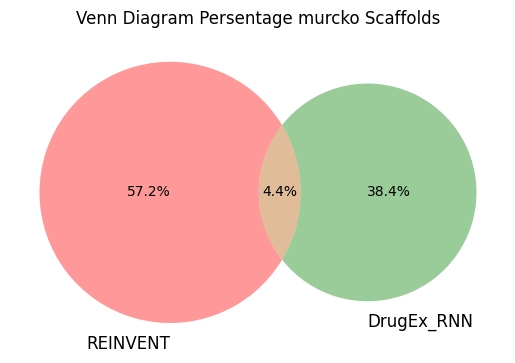

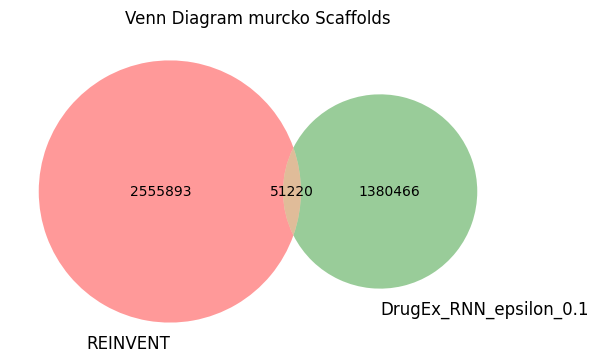

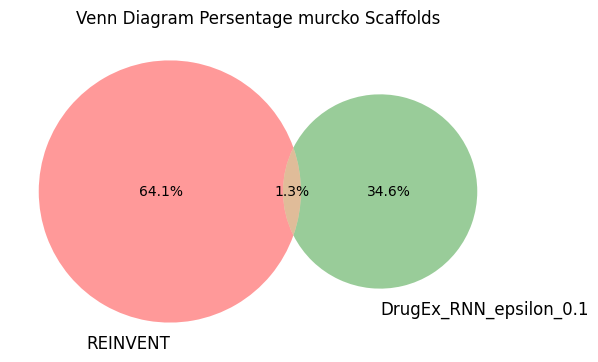

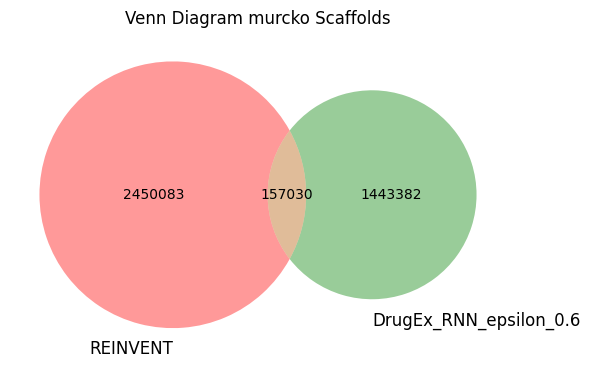

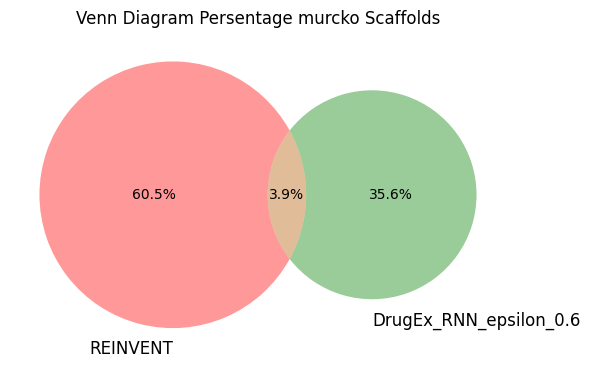

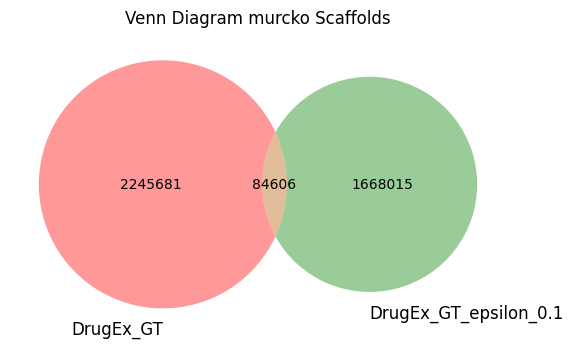

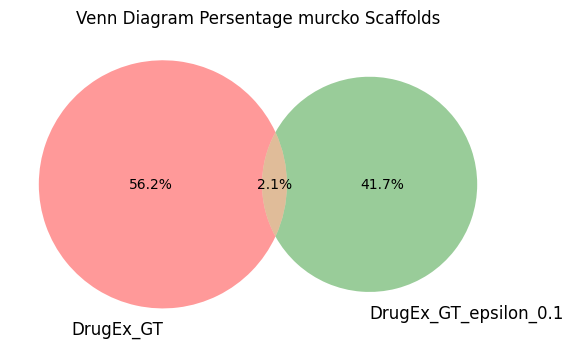

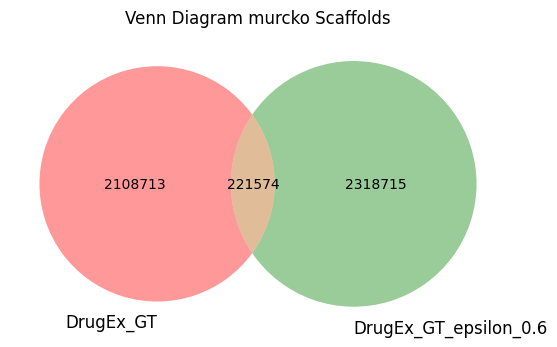

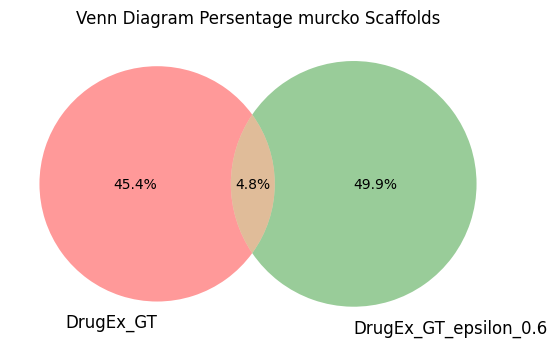

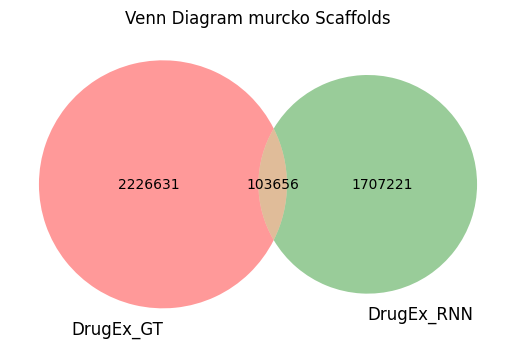

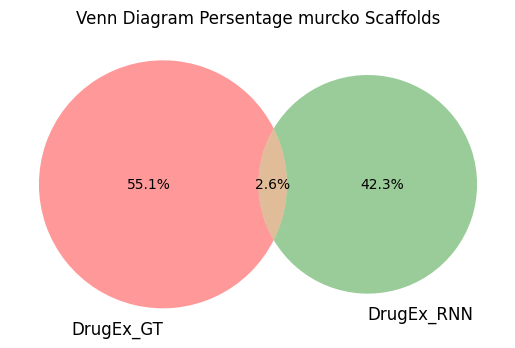

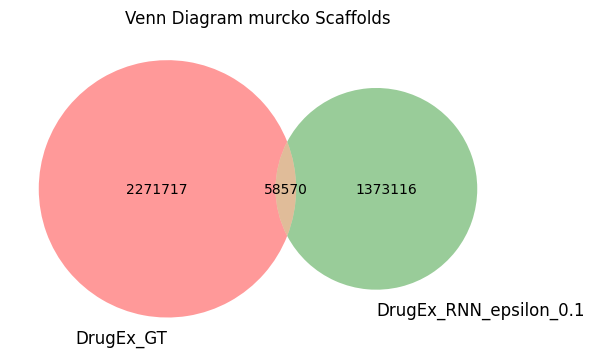

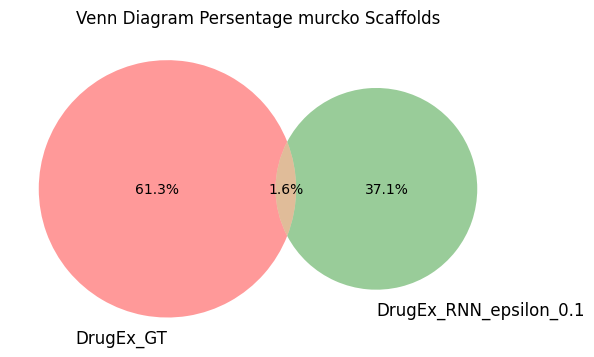

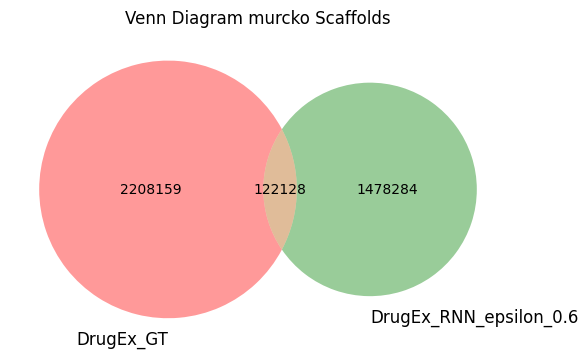

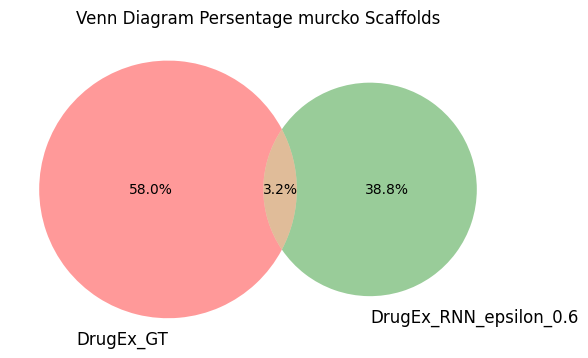

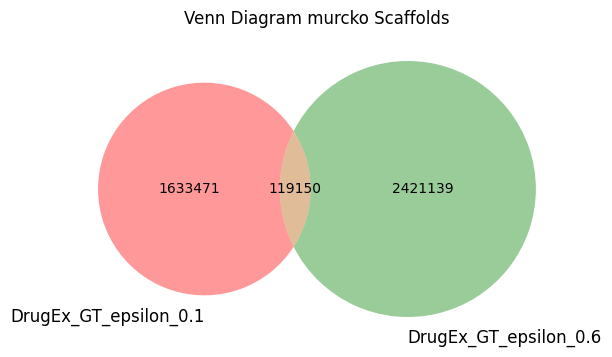

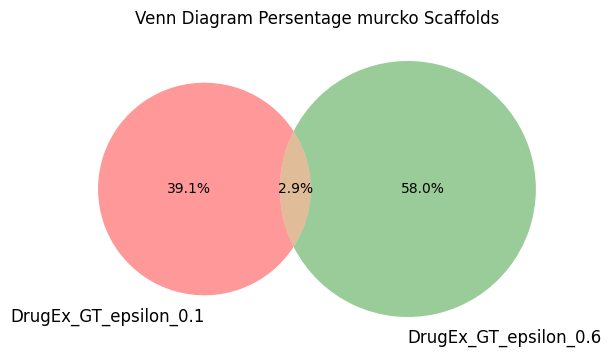

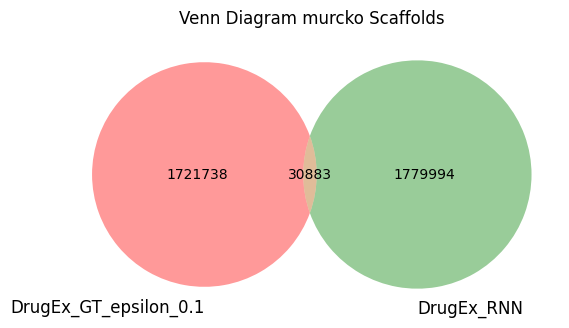

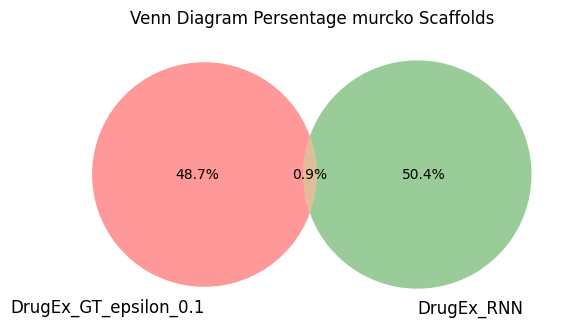

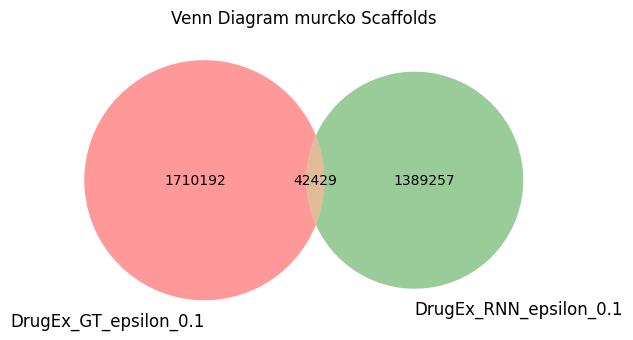

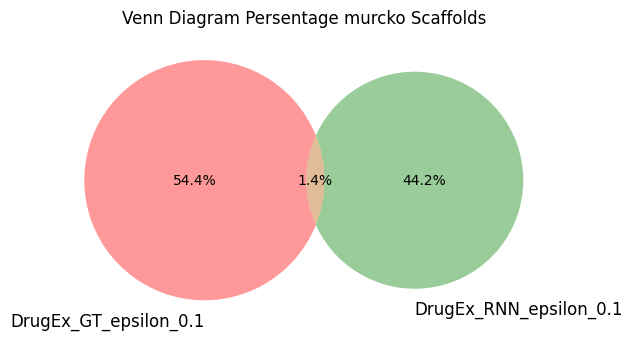

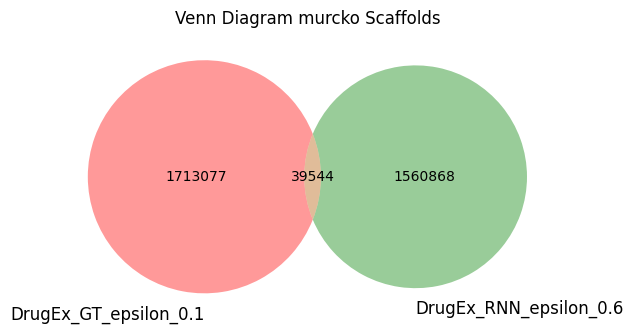

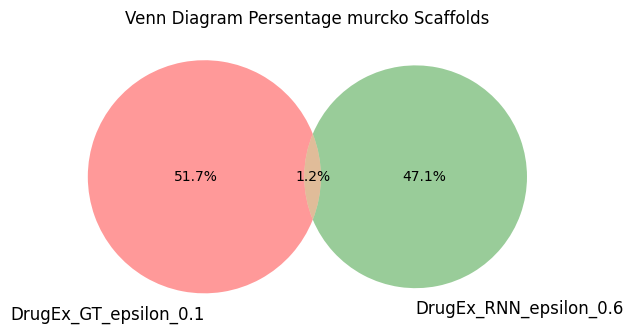

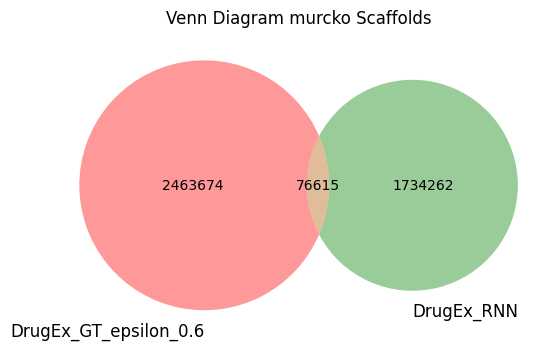

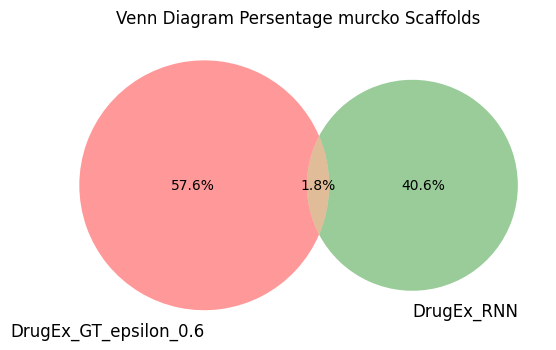

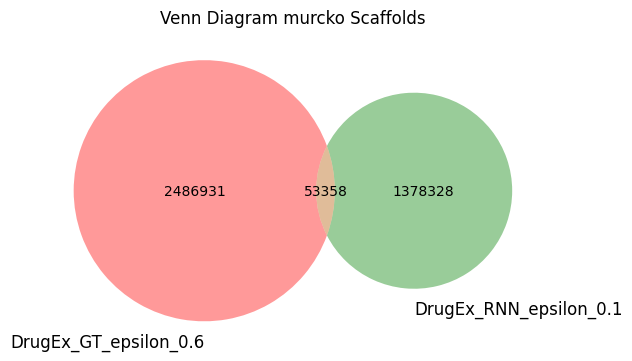

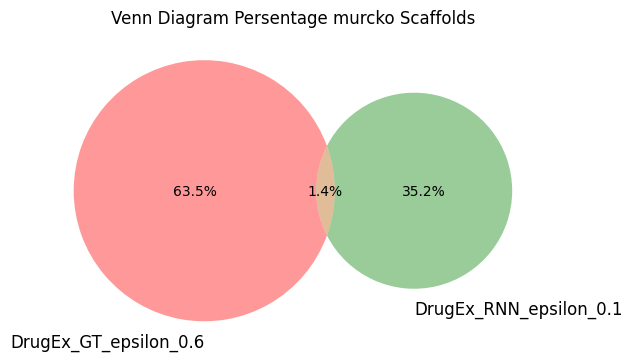

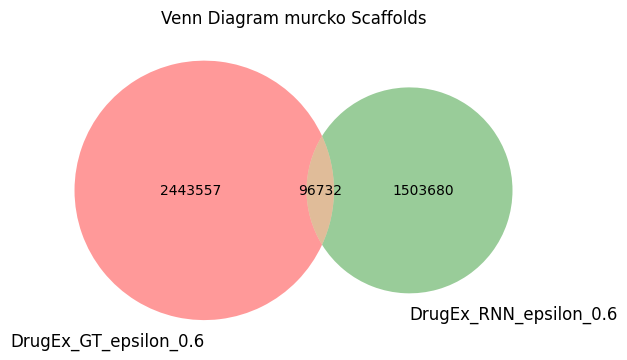

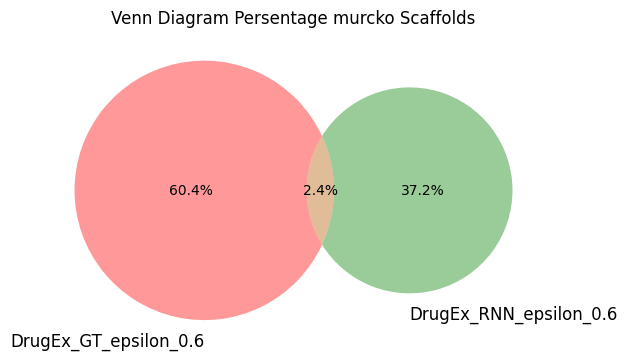

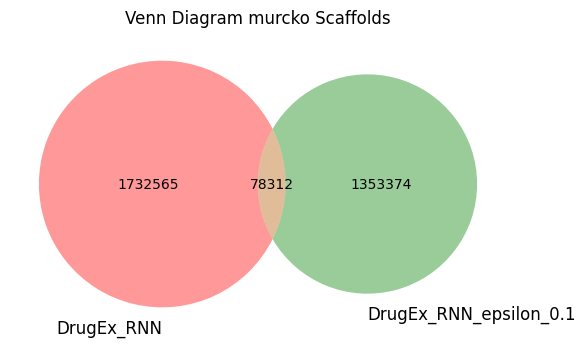

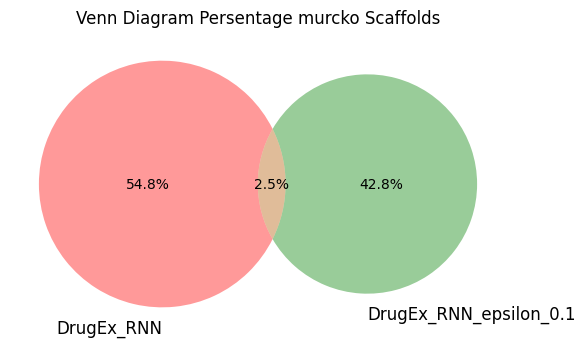

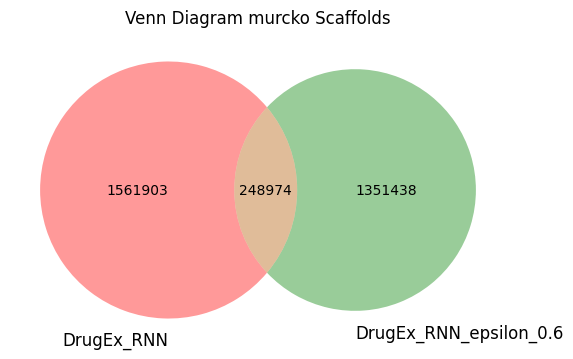

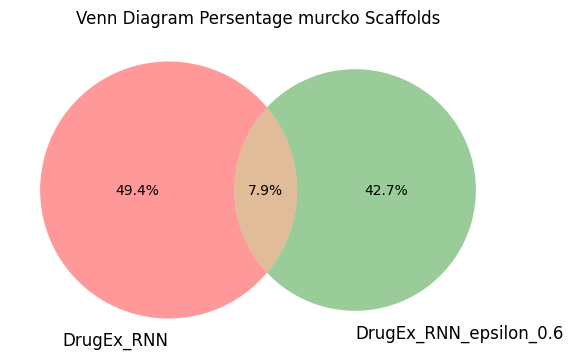

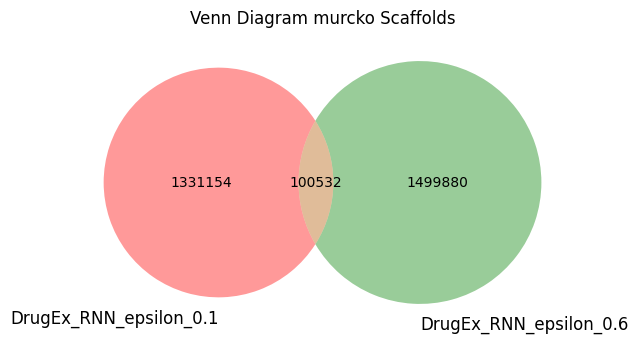

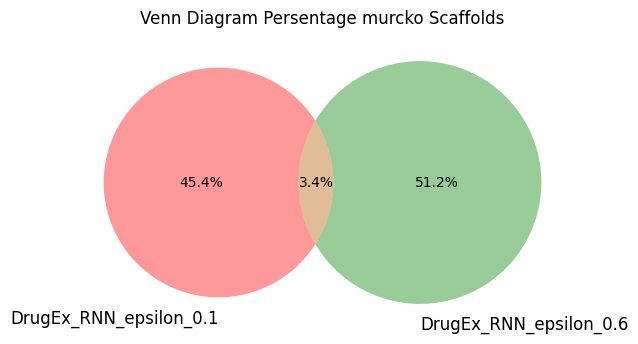

In [6]:

list_of_generators = ['Molpher', 'REINVENT', 'DrugEx_GT', 'DrugEx_GT_epsilon_0.1', 'DrugEx_GT_epsilon_0.6', 'DrugEx_RNN', 
                      'DrugEx_RNN_epsilon_0.1', 'DrugEx_RNN_epsilon_0.6']


for type_scaf in ['csk', 'murcko']:
    for generator_1, generator_2 in list(combinations(list_of_generators, 2)):
        df_generator_1 = pd.DataFrame()
        df_generator_2 = pd.DataFrame()
        for num in [0,1,2,3,4]:
    
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/dis/{generator_1}/scaffolds_of_output_set_cluster_{num}_dis_{generator_1}.csv", header = None)
            df_generator_1 = pd.concat([df_generator_1, df])
        
            df = pd.read_csv(f"data/results/Glucocorticoid_receptor/{type_scaf}_scaffolds/dis/{generator_2}/scaffolds_of_output_set_cluster_{num}_dis_{generator_2}.csv", header = None)
            df_generator_2 = pd.concat([df_generator_2, df])
        df_generator_1 = df_generator_1.reset_index(drop=True)
        df_generator_2 = df_generator_2.reset_index(drop=True)
        
    
        scaffolds_A = set(df_generator_1[0].tolist())
        scaffolds_B = set(df_generator_2[0].tolist())
        
        # Výpočet vztahů mezi množinami
        intersection = scaffolds_A & scaffolds_B  # Společné scaffoldy
        only_in_A = scaffolds_A - scaffolds_B     # Unikátní v A
        only_in_B = scaffolds_B - scaffolds_A     # Unikátní v B
        
        # Vytvoření Vennova diagramu
        venn = venn2([scaffolds_A, scaffolds_B], (generator_1, generator_2))
        if len(intersection) <= 5000:
            venn.get_label_by_id('11').set_text(f"{len(intersection)}")
            venn.get_label_by_id('11').set_fontsize(10)  # Zvýraznění malého čísla
        plt.title(f"Venn Diagram {type_scaf} Scaffolds")
        plt.savefig(f'img/overlaps/{type_scaf}/overlaps_{generator_1}_{generator_2}.png')
        plt.show()
        
        
        # Spočítání celkového počtu jedinečných prvků
        total_unique = len(scaffolds_A | scaffolds_B)
    
        # Výpočet procent pro každou část
        percent_in_A = len(only_in_A) / total_unique * 100
        percent_in_B = len(only_in_B) / total_unique * 100
        percent_intersection = len(intersection) / total_unique * 100
    
        # Vytvoření Vennova diagramu
        venn = venn2([scaffolds_A, scaffolds_B], (generator_1, generator_2))
    
        # Nastavení štítků na procentuální hodnoty
        venn.get_label_by_id('10').set_text(f"{percent_in_A:.1f}%")
        venn.get_label_by_id('01').set_text(f"{percent_in_B:.1f}%")
        venn.get_label_by_id('11').set_text(f"{percent_intersection:.1f}%")
        
        plt.title(f"Venn Diagram Persentage {type_scaf} Scaffolds")
        plt.savefig(f'img/overlaps/{type_scaf}/overlaps_{generator_1}_{generator_2}_persentage.png')
        plt.show()